In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
from pandas import Series,DataFrame

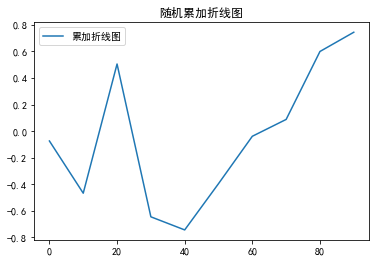

In [35]:
#111111111111111111111111111111111111111111111Series绘图原理
#指定S的索引
s = pd.Series(np.random.randn(10).cumsum(),#累加
              index=np.arange(0,100,10))
#指定索引
index = np.arange(5)
ax=s.plot(label = "累加折线图",title = "随机累加折线图")

ax.legend()
# ax.plot(title = "随机累加折线图")


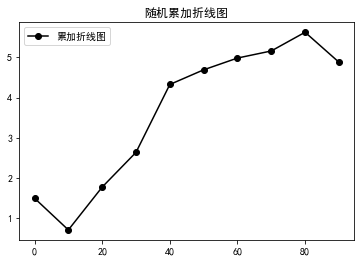

In [36]:
#Series+!+!+!+!+!++!++!+!+!+!+!+!指定S的索引
s = pd.Series(np.random.randn(10).cumsum(),#累加
              index=np.arange(0,100,10))
#指定索引
index = np.arange(5)
ax=s.plot(label = "累加折线图",title = "随机累加折线图",style="ko-")

ax.legend()
# ax.plot(title = "随机累加折线图")


In [15]:
#22222222222222222222222222222222222222DataFrame绘图原理

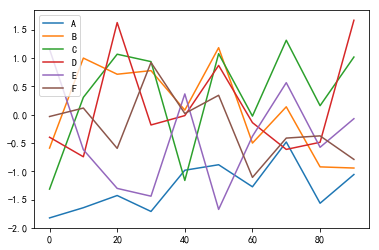

In [31]:
df=DataFrame(np.random.randn(10,6),index = np.arange(0,100,10),
            columns=list("ABCDEF"))
df.plot()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAD0630>,
      dtype=object)

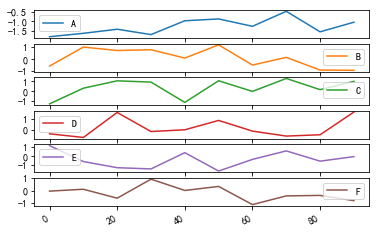

In [39]:
#将Dataframe中各列的数据分配到不同的子图中,是否共用x,y轴
df.plot(subplots=True,sharey=False)

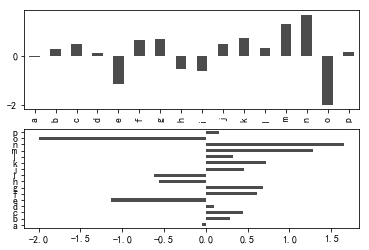

In [42]:
#创建画板，获取Axes对象        绘制多区域柱状图
fig, axes = plt.subplots(2,1)#创建两行一列的画板
data = pd.Series(np.random.randn(16),#创建绘图数据
                 index=list('abcdefghijklmnop'))
data.plot(kind='bar',
          ax=axes[0], color='k',alpha=0.7)  #在第一块画板
data.plot(kind='barh',
          ax=axes[1], color='k',alpha=0.7)  #在第二块画板
plt.show()

In [46]:
#读取pandas中的excel文件
df = pd.read_excel("excel/pandas-matplotlib.xlsx","Sheet1")
df 

,EMPID,Gender,Age,Sales,BMI,Income
0,E001,M,34,123,Normal,350
1,E002,F,40,114,Overweight,450
2,E003,F,37,135,Obesity,169
3,E004,M,30,139,Underweight,189
4,E005,F,44,117,Underweight,183
5,E006,M,36,121,Normal,80
6,E007,M,32,133,Obesity,166
7,E008,F,26,140,Normal,120
8,E009,M,32,133,Normal,75
9,E010,M,36,133,Underweight,40


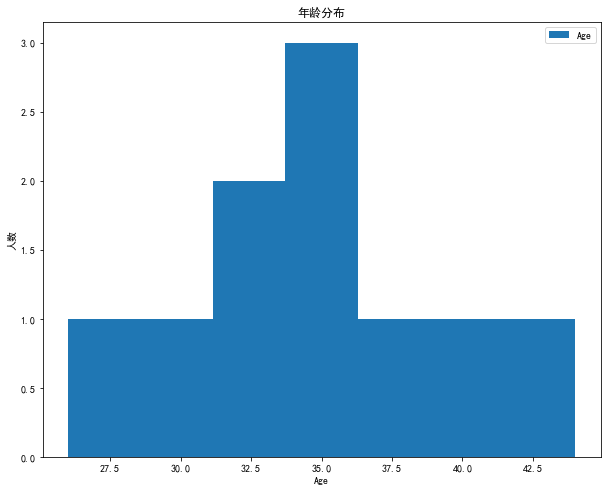

In [58]:
fig = plt.figure()
#创建画布大小
fig.set_size_inches(10,8)

#在画板上添加ax的绘图范围
ax = fig.add_subplot(111)

#画直方图
ax.hist(df['Age'], bins=7)  #平均分布成七段
plt.title('年龄分布')
plt.xlabel('Age')
plt.ylabel('人数')
plt.legend()

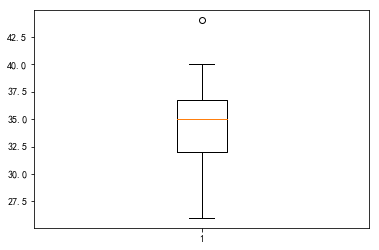

In [61]:
#画板
fig2 = plt.figure()
ax=fig2.add_subplot(111)
ax.boxplot(df.Age)
plt.show()

In [62]:
df.Age

0    34
1    40
2    37
3    30
4    44
5    36
6    32
7    26
8    32
9    36
Name: Age, dtype: int64

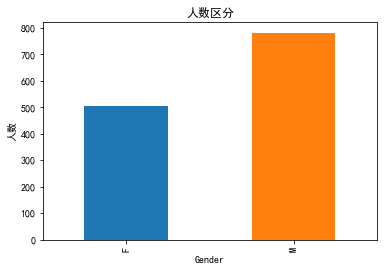

In [70]:
# 条形图
var = df.groupby('Gender').Sales.sum()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("性别")
ax1.set_ylabel("人数")
ax1.set_title("人数区分")
var.plot(kind="bar")

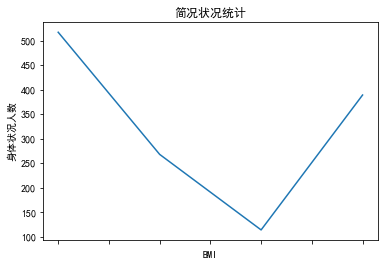

In [84]:
#折线图
var=df.groupby('BMI').Sales.sum()
fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("BMI")
ax.set_ylabel("身体状况人数")
ax.set_title("简况状况统计")
# var.legend()
var.plot(kind="line")

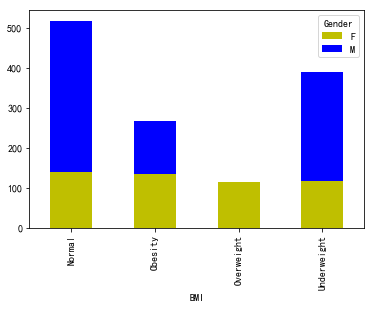

In [83]:
#堆叠图
var2=df.groupby(['BMI','Gender']).Sales.sum().unstack()
var2.plot(kind="bar",stacked=True,  #是否堆叠
         color = ['y','b'])

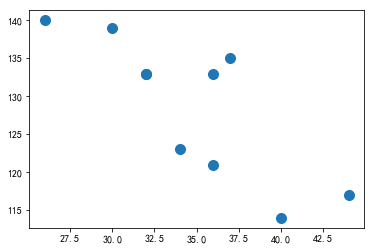

In [86]:
#散点图

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Age'], df['Sales'],s=100)
plt.show()

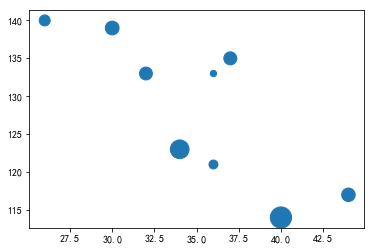

In [87]:

#气泡图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['Age'], df['Sales'], s=df['Income']) # 第三个变量表明根据收入气泡的大小
plt.show()

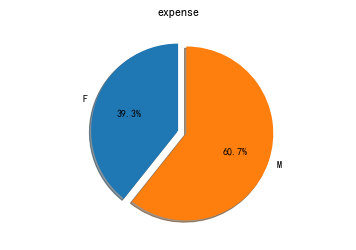

In [93]:
#饼图
var = df.groupby(['Gender']).sum().stack()
temp = var.unstack()
#单独取出
x_list = temp['Sales']
label_list = temp.index
plt.axis('equal') #x与y轴是否相等，，（相当于是否是圆还是椭圆）
plt.pie(x_list, labels=label_list,shadow=True,#是否有阴影
        startangle=90,autopct='%1.1f%%',
       explode=[0,0.1])
plt.title('expense')
plt.show()